# Pryngles module: System

In [1]:
from pryngles import *
%load_ext autoreload
%autoreload 2

In [2]:
#@test:system
def test_system_init(self):
    
    global sys

    Verbose.VERBOSITY=VERB_ALL

    sys=System(resetable=True)
    print("Nbodies = ",sys.nbodies)
    print("G constant = ",sys.G)
    print("G constant = ",sys.units)
    print("Canonical units = ",sys.ul,sys.um,sys.ut)

    sys=System(units=['m','kg','s'])
    print("Nbodies = ",sys.nbodies)
    print("G constant = ",sys.G)
    print("G constant = ",sys.units)
    print("Canonical units = ",sys.ul,sys.um,sys.ut)
    print(sys)

    sys.save_to("/tmp/system.pkl")
    print(sys.status())
    sys2=System("/tmp/system.pkl")
    print(sys2.status())

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_system_init=test_system_init
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

Nbodies =  0
G constant =  0.9999999999999997
G constant =  ['au', 'msun', 'yr2pi']
Canonical units =  149597870700.0 1.9884754159665356e+30 5022642.89091303
Nbodies =  0
G constant =  6.67408e-11
G constant =  ['m', 'kg', 's']
Canonical units =  1.0 1.0 1.0
{'sim': None, 'bodies': OrderedDict(), 'root': None, 'source': None, 'center_root': array([0, 0, 0]), 'orbital_configuration': None, 'n_obs': array([0, 0, 1]), 'alpha_obs': 0, 'center_obs': None, 'sg': None, 'units': ['m', 'kg', 's'], 'ul': 1.0, 'um': 1.0, 'G': 6.67408e-11, 'ut': 1.0, 'nbodies': 0, 'spangle_scatterers': {2: (<class 'pryngles.optics.LambertianGrayAtmosphere'>, {'AS': 'albedo_gray_spherical'}), 4: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 3: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 1: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_normal'}), 0: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albedo_gray_nor


----------------------------------------------------------------------
Ran 1 test in 0.162s

OK


In [3]:
#@test:system
def test_system_add(self):

    global sys

    Verbose.VERBOSITY=VERB_SIMPLE
    #Default behavior
    sys=System()
    S=sys.add()
    P=sys.add("Planet")
    M=sys.add("Planet",name="Moon",parent=P)
    print(sys)
    
    #Add to a system
    sys=System()
    S=sys.add(m=8,radius=4)
    P=sys.add("Planet",parent=S,radius=2,a=10)
    M=sys.add("Planet",name="Moon",parent=P,radius=2,a=1)
    R=sys.add("Ring",parent=P,fi=1.3,fe=2.3)
    print(sys)
    print(sys.root)

    #Error
    O=Star()
    self.assertRaises(ValueError,lambda:sys.add("Planet",name="Error1",parent=S,radius=2,a=10,source=1))
    self.assertRaises(ValueError,lambda:sys.add("Planet",name="Error2",parent=P,radius=2,a=1,source=P))
    self.assertRaises(ValueError,lambda:sys.add("Planet",name="Error3",parent=P,radius=2,a=1,source=O))

    #Several sources in a system
    sys=System()
    S1=sys.add(name="Star1",m=8,radius=4)
    S2=sys.add(name="Star2",parent=S1,m=8,radius=4,a=30)
    PS1=sys.add("Planet",name="PlanetS1",parent=S1,radius=2,a=10)
    MPS1=sys.add("Planet",name="Moon",parent=PS1,radius=2,a=1)
    RPS1=sys.add("Ring",parent=PS1,fi=1.3,fe=2.3)
    PS2=sys.add("Planet",name="PlanetS2",parent=S2,radius=2,a=10)
    
    for name in sys.bodies:
        print(name,sys.bodies[name].source.name)
        #print(f"Body {name}:",sys.bodies[name].scatterer)
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_system_add=test_system_add
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.

  VERB1::add:: Setting the root object as Star
  VERB1::add:: Object 'Star' with name 'Star' has been added.
  VERB1::add:: Object 'Planet' with name 'Planet' has been added.
  VERB1::add:: Object 'Planet' with name 'Moon' has been added.
{'sim': None, 'bodies': OrderedDict([('Star', <pryngles.system.Star object at 0x7fc300cce8b0>), ('Planet', <pryngles.system.Planet object at 0x7fc2e37dbc40>), ('Moon', <pryngles.system.Planet object at 0x7fc2e37dbc70>)]), 'root': <pryngles.system.Star object at 0x7fc300cce8b0>, 'source': None, 'center_root': array([0, 0, 0]), 'orbital_configuration': None, 'n_obs': array([0, 0, 1]), 'alpha_obs': 0, 'center_obs': None, 'sg': None, 'units': ['au', 'msun', 'yr2pi'], 'ul': 149597870700.0, 'um': 1.9884754159665356e+30, 'G': 0.9999999999999997, 'ut': 5022642.89091303, 'nbodies': 3, 'spangle_scatterers': {2: (<class 'pryngles.optics.LambertianGrayAtmosphere'>, {'AS': 'albedo_gray_spherical'}), 4: (<class 'pryngles.optics.LambertianGraySurface'>, {'AL': 'albe


----------------------------------------------------------------------
Ran 1 test in 0.104s

OK


      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_star_properties:: Updating properties of Star
  VERB1::add:: Setting the root object as Star
  VERB1::add:: Object 'Star' with name 'Star' has been added.
      VERB3::_update_childs:: Add child Planet1 to body Star (Star)
      VERB3::_update_parent:: Add parent Star to body Planet (Planet1)
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::update_planet:: Updating Planet
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_planet_properties:: Updating Planet properties
  VERB1::add:: Object 'Planet' with name 'Planet1' has been added.
      VERB3::_update_childs:: Add child Moon1P1 to body Planet (Planet1)
      VERB3::_update_parent:: Add parent Planet1 to body Planet (Moon1P1)
      VERB3::update_body:: Updating Body
      VE

100%|██████████| 100/100 [00:00<00:00, 504.35it/s]
.
----------------------------------------------------------------------
Ran 1 test in 0.583s

OK


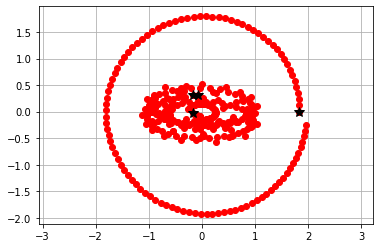

In [4]:
#@test:system
def test_sim(self):

    global sys
    plt.close("all")

    Verbose.VERBOSITY=VERB_ALL

    #Create system
    sys=System(units=['au','msun','yr'])
    S=sys.add(m=8,radius=4)
    P1=sys.add("Planet",name="Planet1",parent=S,radius=2,a=1,M=90*Consts.deg,inc=70*Consts.deg)
    M1P1=sys.add("Planet",name="Moon1P1",parent=P1,radius=2,a=0.1)
    R=sys.add("Ring",name="Ring",parent=P1,radius=2)
    P2=sys.add("Planet",name="Planet2",parent=S,radius=2,a=2,M=0*Consts.deg,inc=0*Consts.deg)
    S.show_tree()
    
    #Initialize
    orbit=sys.initialize_simulation(orbital_tree=[[S,[P1,M1P1]],P2])
    sys.sim.status()
    
    #Check save to disk
    sys.save_to("/tmp/system.pkl")
    sys=System()
    sys.load_from("/tmp/system.pkl")
    sys.sim.status()
    
    #Animate
    Plot.animate_rebound(sys.sim,traces=True,axis=True)
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_sim=test_sim
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

In [5]:
#@test:system
def test_system_remove(self):
    
    global sys

    Verbose.VERBOSITY=VERB_ALL

    sys=System()
    S=sys.add(name="Star",m=8,radius=4)
    P=sys.add("Planet",parent=S,name="Planet",radius=2,a=10)
    M=sys.add("Planet",parent=P,name="Moon",radius=2,a=1)
    R=sys.add("Ring",parent=P,name="Ring",fi=1.3,fe=2.3)
    sys.initialize_simulation()
    print(sys.bodies)
    sys.remove("Ring")
    print(sys.bodies)
    sys.remove("Planet")
    print(sys.bodies)
    sys.remove("Star")
    print(sys.bodies)

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_system_remove=test_system_remove
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_star_properties:: Updating properties of Star
  VERB1::add:: Setting the root object as Star
  VERB1::add:: Object 'Star' with name 'Star' has been added.
      VERB3::_update_childs:: Add child Planet to body Star (Star)
      VERB3::_update_parent:: Add parent Star to body Planet (Planet)
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::update_planet:: Updating Planet
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_planet_properties:: Updating Planet properties
  VERB1::add:: Object 'Planet' with name 'Planet' has been added.
      VERB3::_update_childs:: Add child Moon to body Planet (Planet)
      VERB3::_update_parent:: Add parent Planet to body Planet (Moon)
      VERB3::update_body:: Updating Body
      VERB3::_updat

/Users/jorgezuluagacallejas/opt/anaconda3/lib/python3.9/site-packages/rebound/simulation.py:712: RuntimeWarning: Last particle removed.
  warnings.warn(msg[1:], RuntimeWarning)
.

      VERB3::update_ring:: Updating Ring
      VERB3::update_body:: Updating Body
      VERB3::_update_properties:: Updating properties of Body
      VERB3::_update_ring_properties:: Updating Ring properties
  VERB1::add:: Object 'Ring' with name 'Ring' has been added.
OrderedDict([('Star', <pryngles.system.Star object at 0x7fc2e37db1f0>), ('Planet', <pryngles.system.Planet object at 0x7fc2c10c7ca0>), ('Moon', <pryngles.system.Planet object at 0x7fc2c10c7d00>), ('Ring', <pryngles.system.Ring object at 0x7fc2c10c7d30>)])
  VERB1::remove:: Removing object Ring from system
OrderedDict([('Star', <pryngles.system.Star object at 0x7fc2e37db1f0>), ('Planet', <pryngles.system.Planet object at 0x7fc2c10c7ca0>), ('Moon', <pryngles.system.Planet object at 0x7fc2c10c7d00>)])
  VERB1::remove:: Removing object Planet from system
  VERB1::remove:: Removing object Moon from system
  VERB1::remove:: Removing particle Moon from simulation
  VERB1::remove:: Removing particle Planet from simulation
Ordere


----------------------------------------------------------------------
Ran 1 test in 0.288s

OK


None
Index(['name', 'spangle_type', 'geometry', 'scale', 'n_equ', 'alpha_equ', 'w',
       'q0', 'center_equ', 'x_equ',
       ...
       'visible', 'intersect', 'shadow', 'indirect', 'emit', 'above',
       'illuminated', 'transmit', 'transit', 'occult'],
      dtype='object', length=103)


.
----------------------------------------------------------------------
Ran 1 test in 1.473s

OK


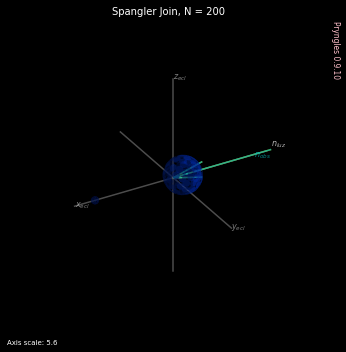

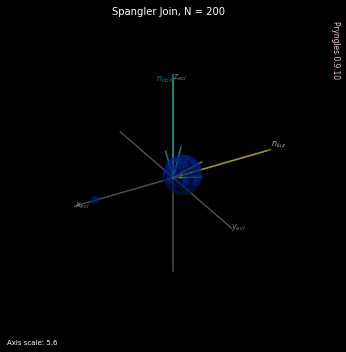

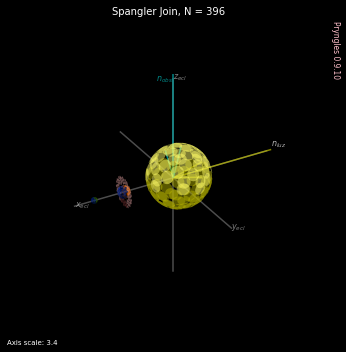

In [6]:
#@test:system
def test_spangleobs(self):

    global sys
    plt.close("all")

    Verbose.VERBOSITY=VERB_NONE

    nspangles=100

    #Define system
    sys=System(resetable=True)

    #Add objects
    S=sys.add(nspangles=nspangles,m=8,radius=1)
    P=sys.add("Planet",parent=S,nspangles=nspangles,m=1,radius=0.2,a=5)

    #Test setting observer without spangling
    self.assertRaises(AssertionError,lambda:sys._set_observer(nvec=[1,0,0]))

    #Spangle system
    sys.initialize_simulation()
    sys.spangle_system()

    sys._set_observer(nvec=[-1,0,0])
    sys.sg.plot3d()

    sys._set_observer(nvec=[0,0,1])
    sys.sg.plot3d()
    
    #Spangle with light
    nspangles=100
    sys=System(resetable=False)
    S=sys.add(name="Star",nspangles=nspangles,m=9,radius=1)
    P=sys.add("Planet",parent=S,name="Planet",nspangles=nspangles,radius=0.2,a=2)
    M=sys.add("Planet",parent=P,name="Moon",nspangles=nspangles,radius=0.1,a=1)
    R=sys.add("Ring",parent=P,name="Ring",nspangles=nspangles,fi=1.3,fe=2.3,i=90*Consts.deg)

    sys.initialize_simulation()
    sys.spangle_system()

    #Check addition columns
    print(sys.source)
    print(sys.sg.data.columns)

    #Check save
    sys.save_to("/tmp/system.pkl")

    #Check plot
    #sys.sp.plot3d(center_at="Ring",not_plot=["Star1","Star2"])
    sys.sg.plot3d()

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_spangleobs=test_spangleobs
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

,hidden_by_luz
2197,Ring:-1.036e+01&
2205,Ring:-1.036e+01&
2210,Ring:-1.036e+01&
2218,Ring:-1.036e+01&
2231,Ring:-1.036e+01&
2239,Ring:-1.036e+01&
2244,Ring:-1.036e+01&
2252,Ring:-1.036e+01&
2265,Ring:-1.036e+01&
2273,Ring:-1.036e+01&


.
----------------------------------------------------------------------
Ran 1 test in 4.445s

OK


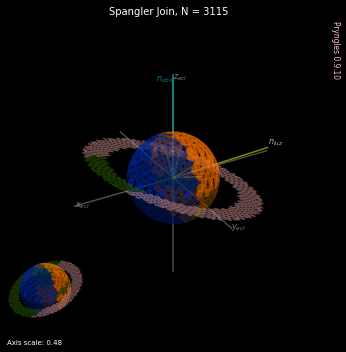

In [7]:
#@test:system
def test_setluz(self):

    global sys
    plt.close("all")

    Verbose.VERBOSITY=VERB_NONE
    nspangles=500
    sys=System()
    S=sys.add("Star",nspangles=nspangles,m=1,radius=1)
    D=sys.add("Ring",name="Disk",parent=S,nspangles=nspangles,fi=20,fe=30,i=0*Consts.deg)
    P=sys.add("Planet",parent=S,nspangles=nspangles,radius=0.2,m=1e-3,a=10)
    R=sys.add("Ring",parent=P,nspangles=nspangles,fi=1.5,fe=2.0,i=-20*Consts.deg)
    M=sys.add("Planet",parent=P,name="Moon",nspangles=nspangles,radius=0.1,m=1e-6,a=1,M=30*Consts.deg)
    K=sys.add("Ring",name="Cronoring",parent=M,nspangles=nspangles,fi=1.1,fe=1.5,i=20*Consts.deg)
    
    sys.initialize_simulation()
    sys.spangle_system()
    
    sys.sg.plot3d(center_at="Ring",not_plot=["Disk"])
    #sys.sg.plot3d(center_at="Ring")
    #sys.sg.plot3d()
    cond=(sys.sg.data.name=="Moon")&(sys.sg.data.hidden_by_luz!="")
    print_df(sys.sg.data.loc[cond,["hidden_by_luz"]].head(10))

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_setluz=test_setluz
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

.
----------------------------------------------------------------------
Ran 1 test in 6.014s

OK


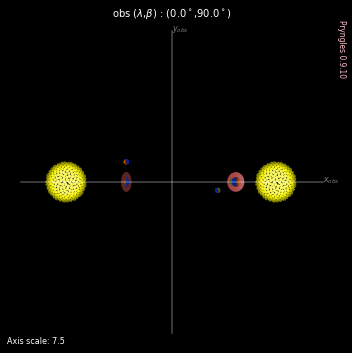

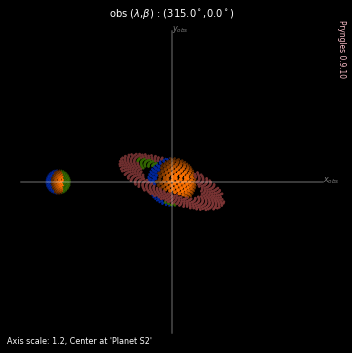

In [8]:
#@test:system
def test_setmultiple(self):

    global sys
    plt.close("all")

    Verbose.VERBOSITY=VERB_NONE

    nspangles=500
    sys=System(resetable=False)

    S=sys.add(name="Star",nspangles=nspangles,m=9,radius=1)
    P=sys.add("Planet",parent=S,name="Planet",nspangles=nspangles,radius=0.2,a=3)
    M=sys.add("Planet",parent=P,name="Moon",nspangles=nspangles,m=1e-3,radius=0.1,a=1,M=90*Consts.deg)
    R=sys.add("Ring",parent=P,name="Ring",nspangles=nspangles,fi=1.3,fe=2.3,i=60*Consts.deg)

    S2=sys.add(name="Star2",parent=S,nspangles=nspangles,m=9,radius=1,a=10)
    P2=sys.add("Planet",parent=S2,name="Planet S2",nspangles=nspangles,radius=0.2,a=2,M=180*Consts.deg)
    R2=sys.add("Ring",parent=P2,name="Ring2",nspangles=nspangles,fi=1.3,fe=2.3,i=30*Consts.deg)
    M2=sys.add("Planet",parent=P2,name="Moon PS2",nspangles=nspangles,m=1e-3,radius=0.1,a=1,M=205*Consts.deg)

    orbital_tree=[[S,[P,M]],[S2,[P2,M2]]]

    sys.initialize_simulation(orbital_tree)
    sys.spangle_system()

    #Show system from above
    sys.sg.plot2d()

    #Show only Star 2 system
    sys.update_perspective(n_obs=[1,-1,0])
    sys.sg.plot2d(include=["Planet S2","Ring2","Moon PS2"])
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_setmultiple=test_setmultiple
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

In [9]:
#@test:system
def test_update(self):

    Verbose.VERBOSITY=VERB_NONE

    nspangles=100
    sys=System(resetable=True)
    S=sys.add("Star",name="Star",nspangles=nspangles,m=8,radius=1)
    P=sys.add("Planet",parent=S,name="Planet",nspangles=nspangles,radius=0.2,a=2)
    M=sys.add("Planet",parent=P,name="Moon",nspangles=nspangles,radius=0.1,a=1)
    R=sys.add("Ring",parent=P,name="Ring",nspangles=nspangles,fi=1.3,fe=2.3,i=90*Consts.deg)
    print(P.radius)
    sys.update_body(P,radius=0.5)
    print(P.radius)
    sys.update_body("Ring",fe=3.0)
    print(R.radius)
    sys.initialize_simulation()
    sys.spangle_system()
    self.assertRaises(AssertionError,lambda:sys.update_body("Ring",fe=3.0))

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_update=test_update
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

0.2
0.5
1.15


.
----------------------------------------------------------------------
Ran 1 test in 0.580s

OK


<IPython.core.display.Javascript object>


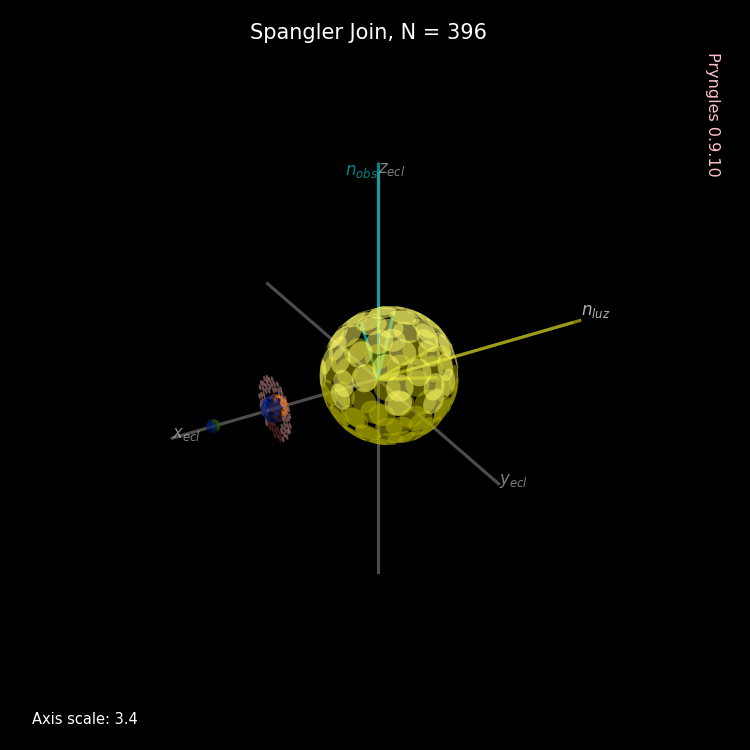

<IPython.core.display.Javascript object>


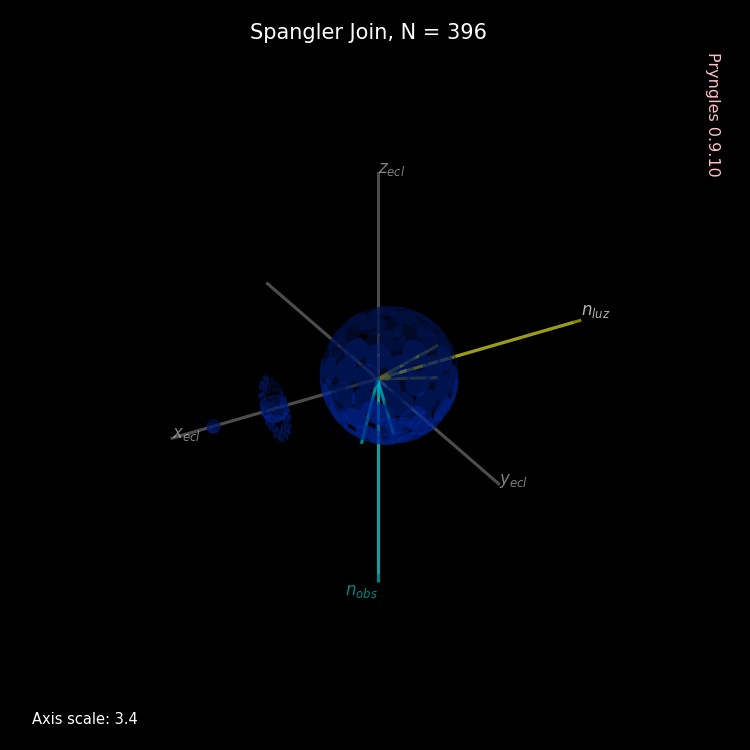

<IPython.core.display.Javascript object>


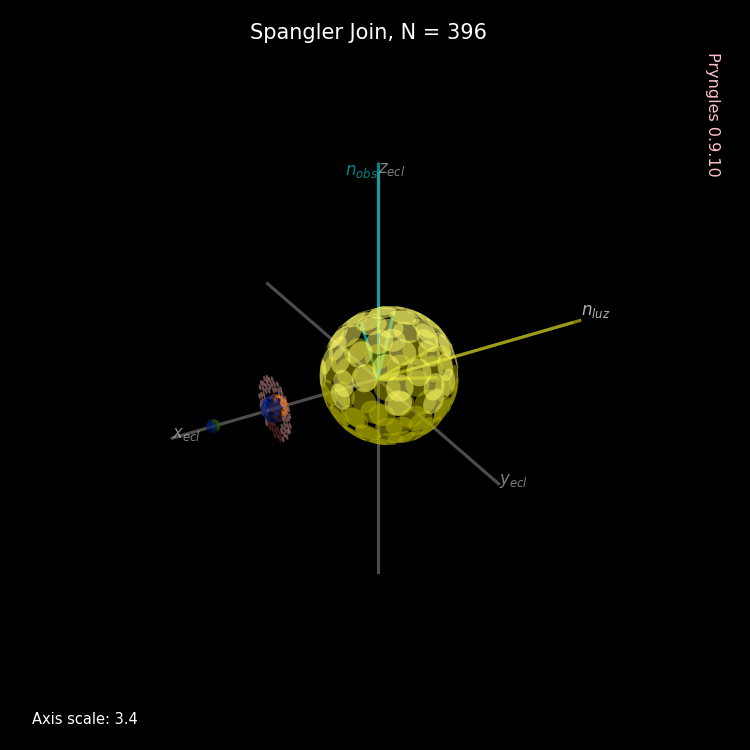

.
----------------------------------------------------------------------
Ran 1 test in 1.318s

OK


In [10]:
#@test:system
def test_reset(self):

    global sys

    Verbose.VERBOSITY=VERB_NONE

    nspangles=100
    sys=System(resetable=True)
    S=sys.add("Star",name="Star",nspangles=nspangles,m=8,radius=1)
    P=sys.add("Planet",parent=S,name="Planet",nspangles=nspangles,radius=0.2,a=2)
    M=sys.add("Planet",parent=P,name="Moon",nspangles=nspangles,radius=0.1,a=1)
    R=sys.add("Ring",parent=P,name="Ring",nspangles=nspangles,fi=1.3,fe=2.3,i=90*Consts.deg)
    
    sys.initialize_simulation()
    sys.spangle_system()

    #All transformations from here are not stored
    sys.sg.plot3d()
    sys._set_observer(nvec=[0,0,-1])
    sys.sg.plot3d()

    #All transformations from here are not stored
    sys.reset()
    sys.sg.plot3d()

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_reset=test_reset
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

<IPython.core.display.Javascript object>


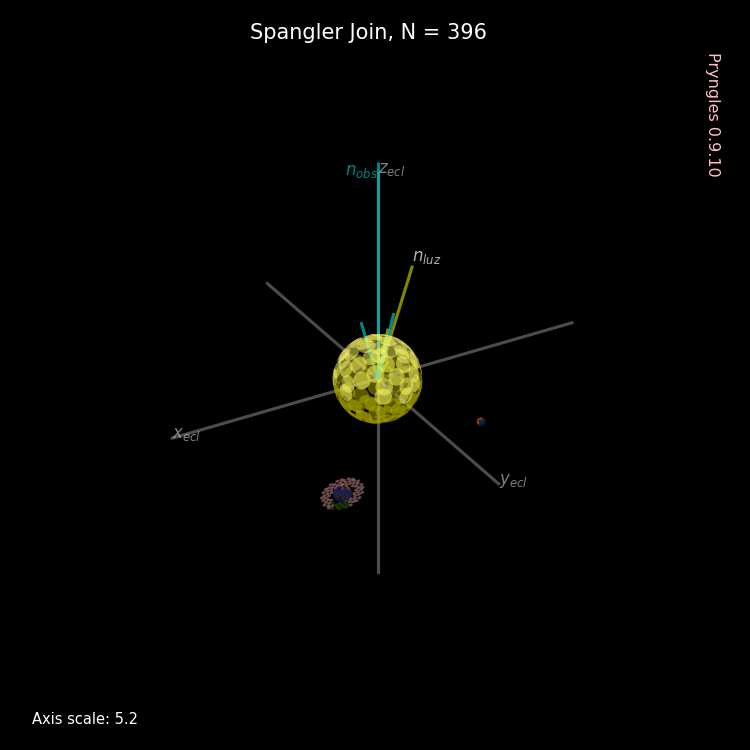

<IPython.core.display.Javascript object>


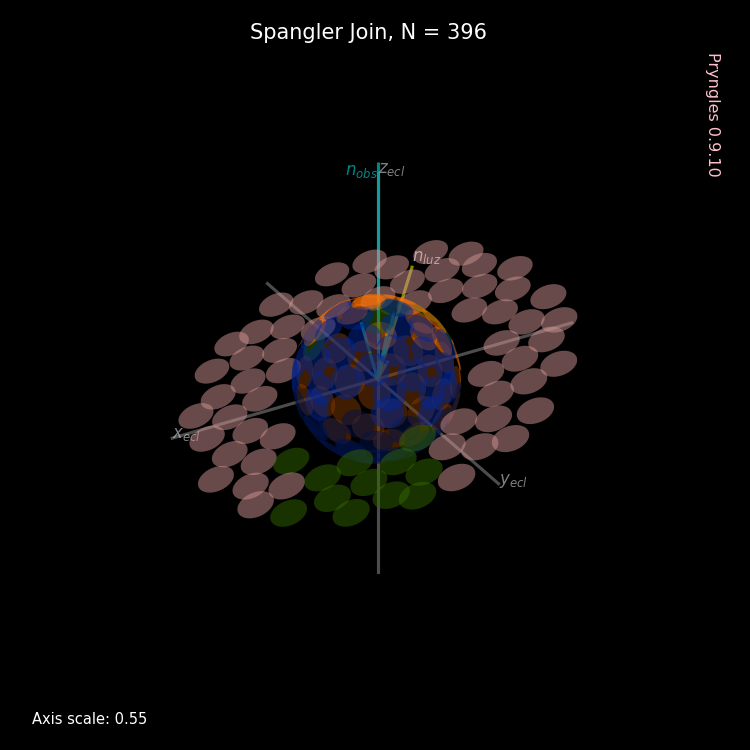

.
----------------------------------------------------------------------
Ran 1 test in 1.217s

OK


In [11]:
#@test:system
def test_int(self):

    global sys
    plt.close("all")

    Verbose.VERBOSITY=VERB_NONE

    nspangles=100
    sys=System()
    S=sys.add("Star",name="Star",nspangles=nspangles,m=1,radius=1)
    M=sys.add("Planet",parent=S,name="Moon",nspangles=nspangles,radius=0.1,m=1e-6,a=3)
    P=sys.add("Planet",parent=S,name="Planet",nspangles=nspangles,radius=0.2,m=1e-3,a=5)
    R=sys.add("Ring",parent=P,name="Ring",nspangles=nspangles,fi=1.3,fe=2.3,i=20*Consts.deg)
    
    sys.initialize_simulation([[S,M],P])
    sys.spangle_system()

    sys.integrate(10)

    sys._set_observer([0,0,1])
    sys._set_luz()

    sys.sg.plot3d()
    sys.sg.plot3d(center_at="Ring")

    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_int=test_int
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

<IPython.core.display.Javascript object>


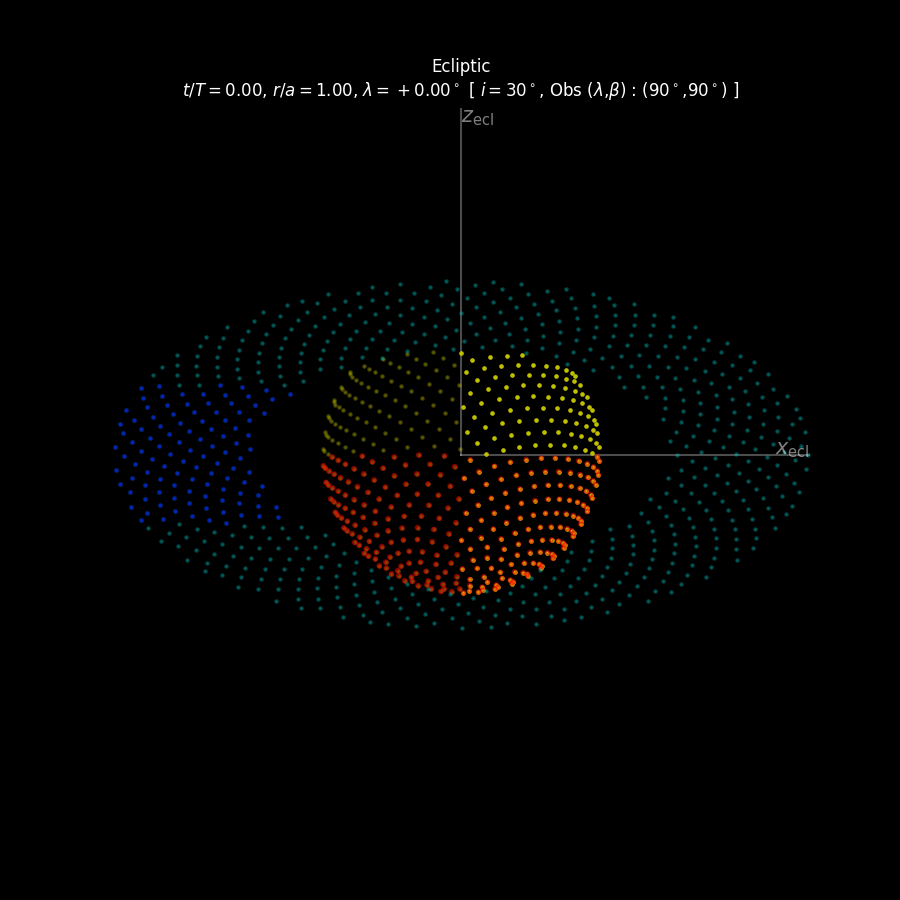

<IPython.core.display.Javascript object>


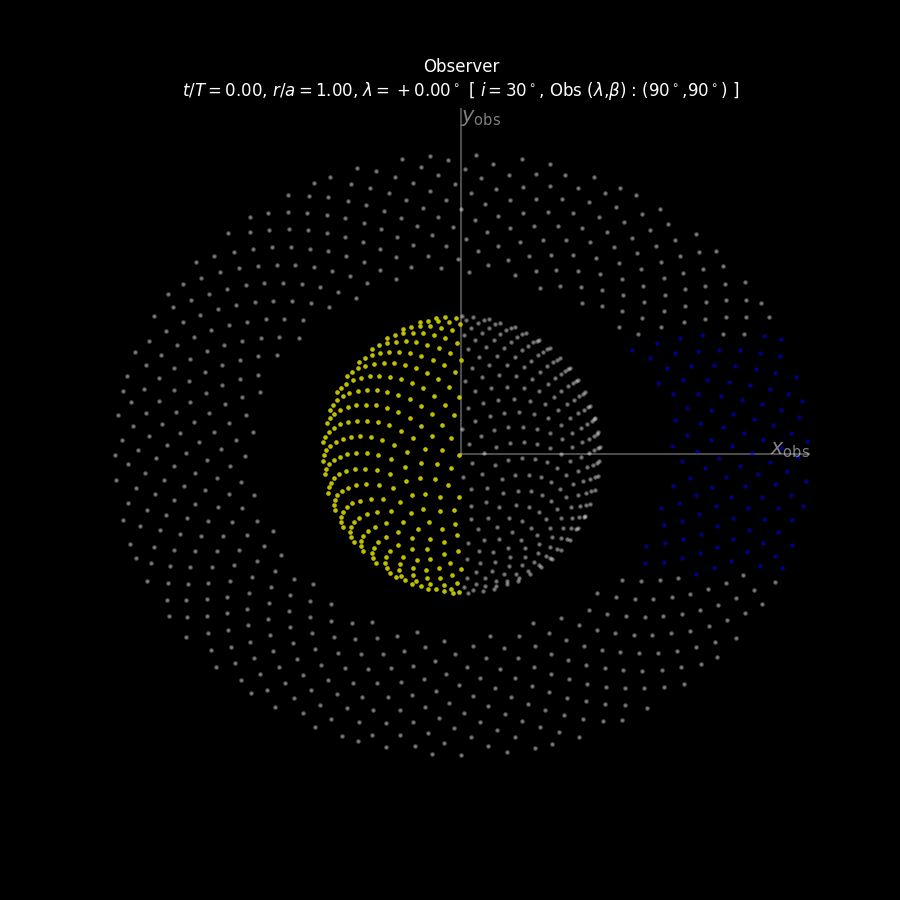

<IPython.core.display.Javascript object>


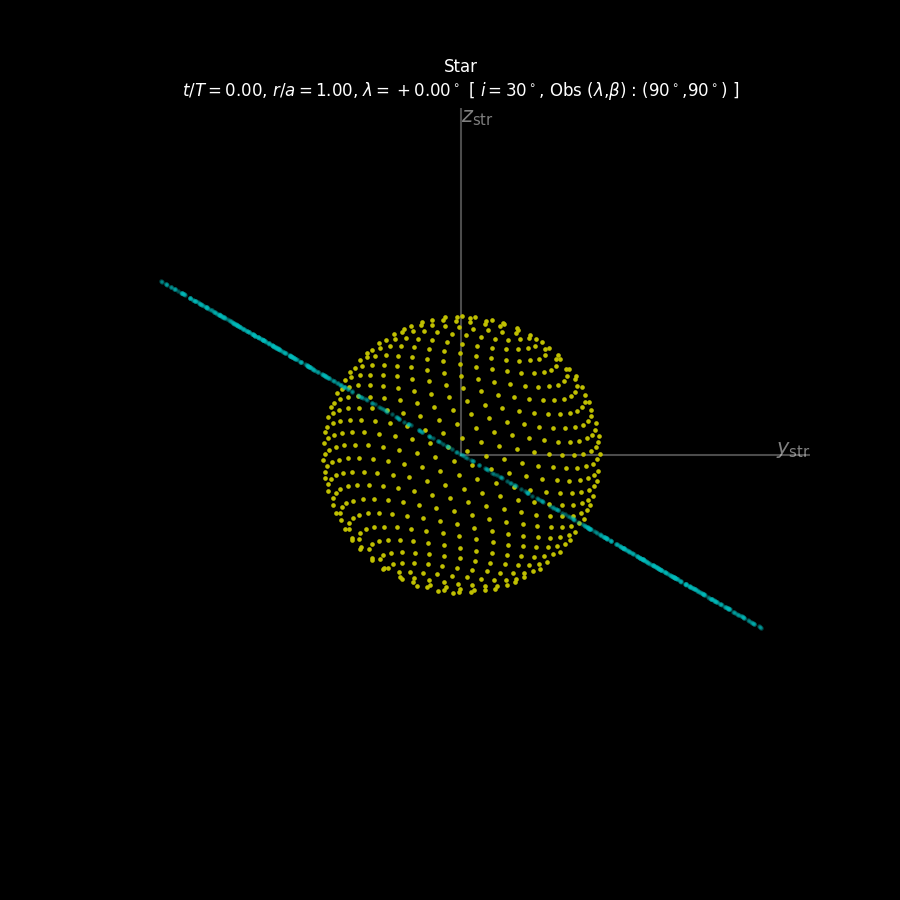

<IPython.core.display.Javascript object>


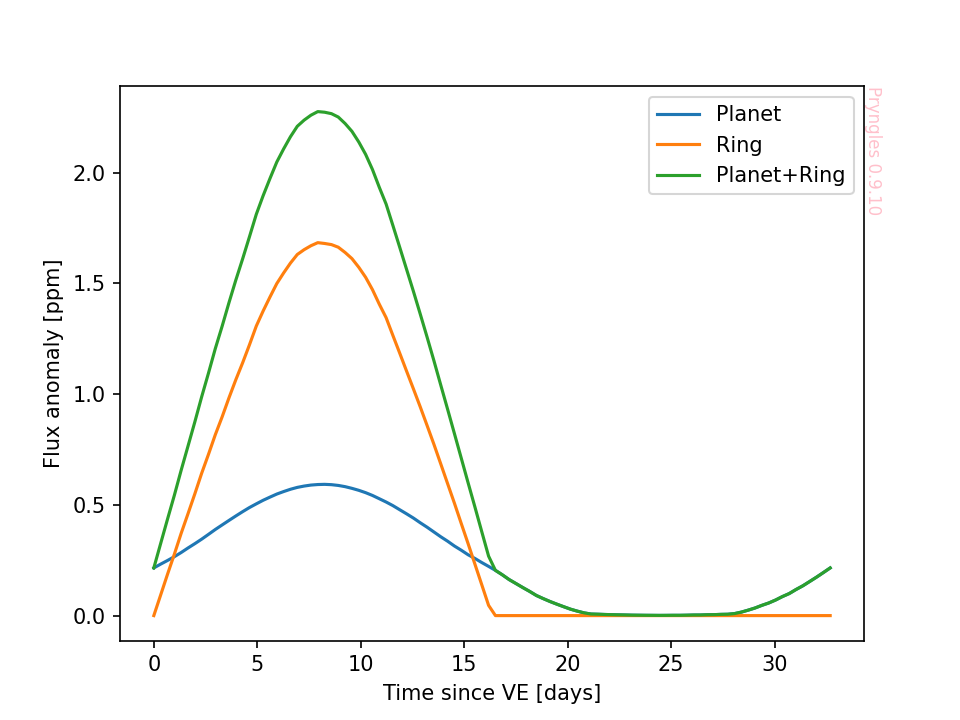

.
----------------------------------------------------------------------
Ran 1 test in 4.553s

OK


In [12]:
#@test:system
def test_legacy(self):

    global sys,RP

    Verbose.VERBOSITY=VERB_NONE
    sys=System()
    S=sys.add(kind="Star",radius=Consts.rsun/sys.ul,limb_coeffs=[0.65])
    P=sys.add(kind="Planet",parent=S,a=0.2,e=0.0,radius=Consts.rsaturn/sys.ul)
    R=sys.add(kind="Ring",parent=P,fi=1.5,fe=2.5,i=30*Consts.deg)
    RP=sys.ensamble_system(lamb=90*Consts.deg,beta=90*Consts.deg)
    ecliptic,observer,star=RP.plotRingedPlanet(showfig=1)
    
    RP.changeObserver([90*Consts.deg,30*Consts.deg])

    lamb_initial=+0.0*Consts.deg
    lamb_final=+360*Consts.deg
    lambs=np.linspace(lamb_initial,lamb_final,100)
    Rps=[]
    Rrs=[]
    ts=[]
    for lamb in lambs:
        RP.changeStellarPosition(lamb)
        ts+=[RP.t*RP.CU.UT]
        RP.updateOpticalFactors()
        RP.updateDiffuseReflection()
        Rps+=[RP.Rip.sum()]
        Rrs+=[RP.Rir.sum()]

    ts=np.array(ts)
    Rps=np.array(Rps)
    Rrs=np.array(Rrs)

    #Middle transit
    ts=(ts-ts[0])/Consts.day

    #Plot
    fig=plt.figure()
    ax=fig.gca()    
    ax.plot(ts,1e6*Rps,label="Planet")
    ax.plot(ts,1e6*Rrs,label="Ring")
    ax.plot(ts,1e6*(Rps+Rrs),label="Planet+Ring")

    ax.set_xlabel("Time since VE [days]")
    ax.set_ylabel("Flux anomaly [ppm]")
    Extra.prynglesMark(ax)

    ax.legend();
    
    Verbose.VERBOSITY=VERB_NONE

class Test(unittest.TestCase):pass    
Test.test_legacy=test_legacy
unittest.main(argv=['first-arg-is-ignored'],exit=False)
#@end:test

### The end

In [31]:
#@end:module

## Playing ground